 Trisha Baldha
 
 Task-2 : Prediction using Unsupervised ML


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Identifying species using K-means clustering on 'Iris' dataset.
 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

#read dataset and removing entries with numm target

X_full = pd.read_csv('/content/drive/MyDrive/Iris.csv', index_col = 'Id')
y = X_full.Species
X_full.drop(['Species'],axis =1, inplace = True )

X_full.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 5.9 KB


Exploratory Data Analysis
 

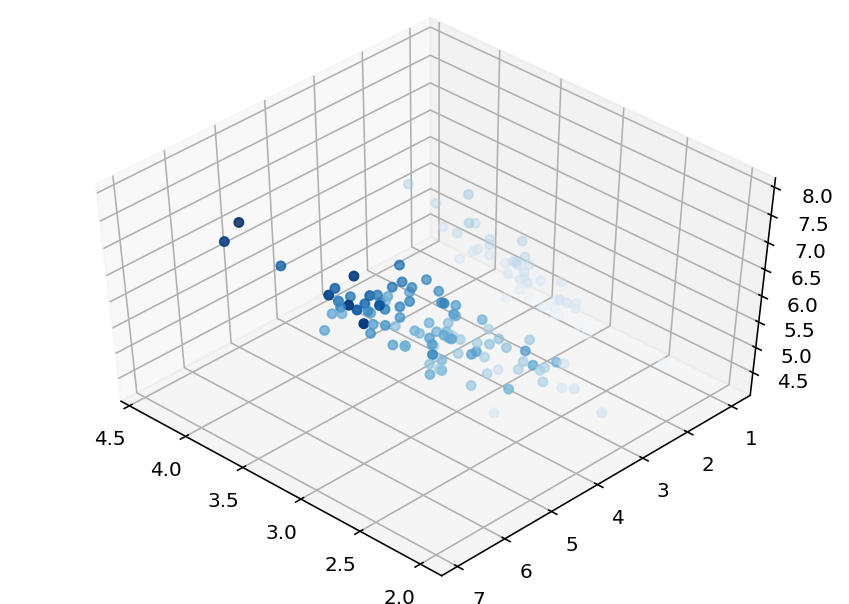

In [ ]:
#Visualizing clusters in 3D plot

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from mpl_toolkits.mplot3d import Axes3D

#creating 3d plot

fig = plt.figure(1)
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

zdata = X_full['SepalLengthCm']
xdata = X_full['SepalWidthCm']
ydata = X_full['PetalLengthCm']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Blues');



Plotting 3-D scatter plot using sepal length, sepal width and petal length.

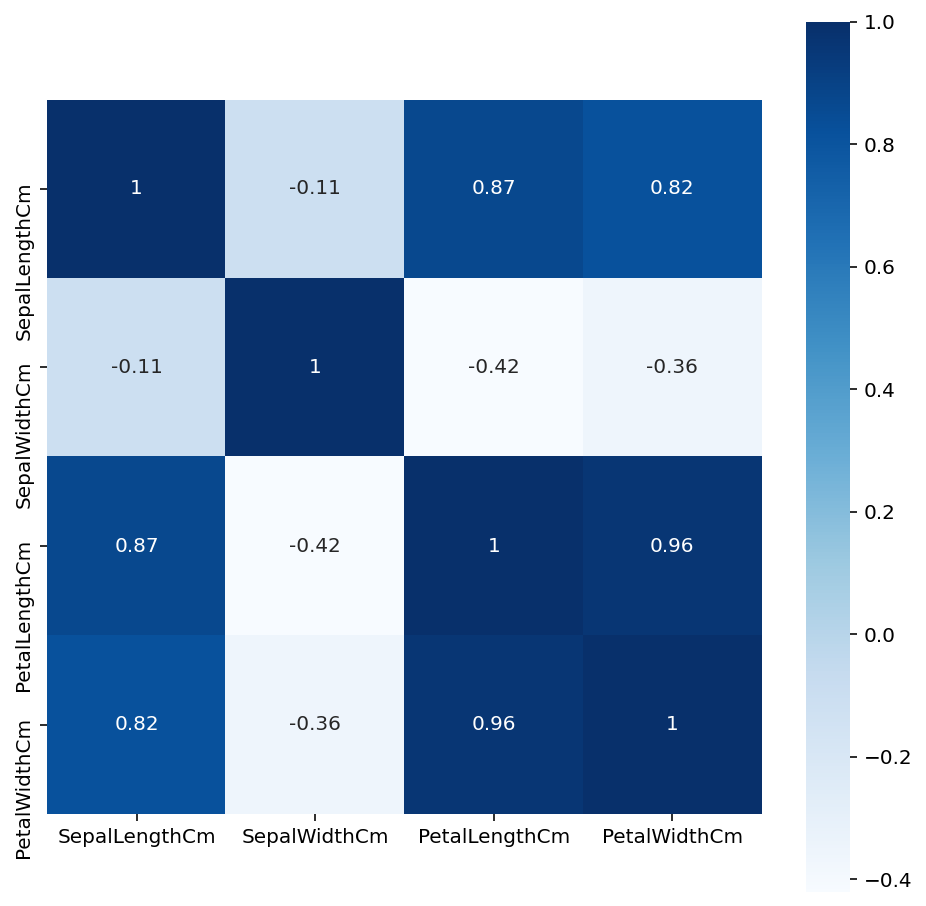

In [ ]:
#Creating Heatmap for analysing correlation between different features
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(X_full.corr(), square = True, cmap = 'Blues', annot = True)

Petal Length and Petal width are highly correlated.  

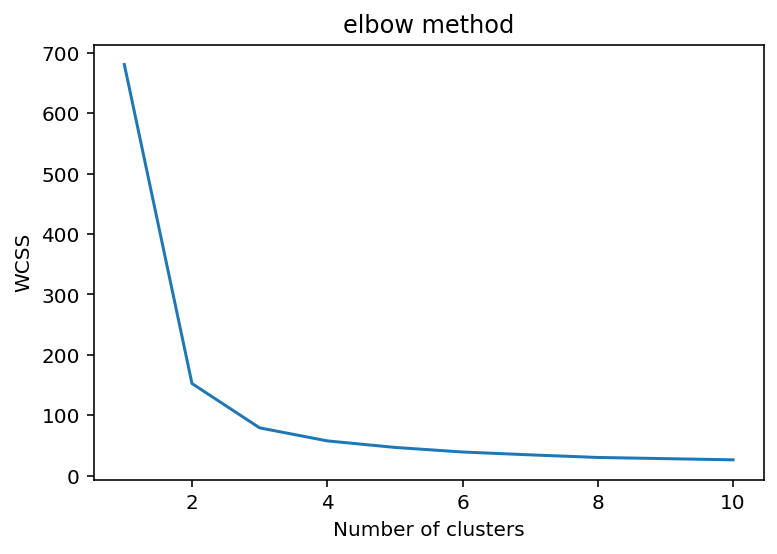

In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init = 'k-means++', 
                  max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X_full)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_full)



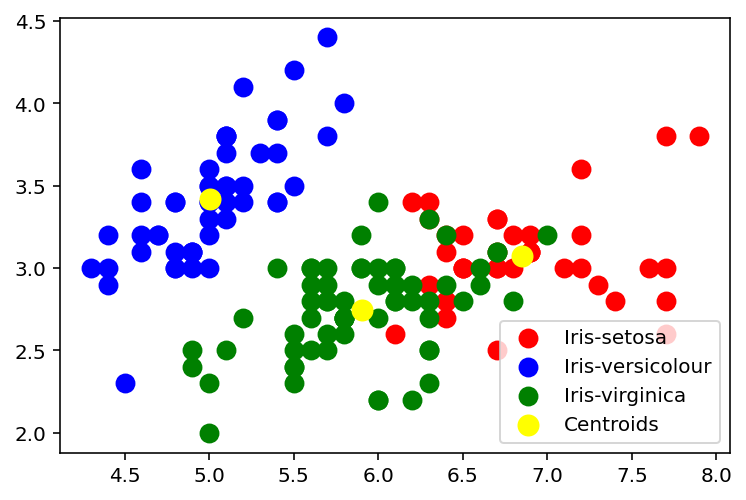

In [ ]:
# Visualising the clusters - On the first two columns
plt.scatter(X_full[y_kmeans == 0].SepalLengthCm,  X_full[y_kmeans == 0].SepalWidthCm, 
            s = 80, c = 'red', label = 'Iris-setosa')
plt.scatter(X_full[y_kmeans == 1].SepalLengthCm, X_full[y_kmeans == 1].SepalWidthCm, 
            s = 80, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X_full[y_kmeans == 2].SepalLengthCm, X_full[y_kmeans == 2].SepalWidthCm,
            s = 80, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()